<a href="https://colab.research.google.com/github/f-Ayuk/summative_assignment_2/blob/main/Favor_Ayuk_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Find a Dataset
The dataset will contain features like:

Airline

Scheduled hour of the flight

Day of the week

Temperature

Wind speed

Precipitation

Air traffic congestion

Visibility

2. Dataset Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset (replace with the actual dataset)
df = pd.read_csv('/content/airport_delays_dataset.csv')

# Preprocessing - Handling missing values
df = df.dropna()

# Feature and target separation
X = df[['airline', 'scheduled_hour', 'day_of_week', 'temperature', 'wind_speed', 'precipitation', 'visibility', 'air_traffic']]
y = df['arrival_delay']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df.head()

,airline,flight_number,departure_airport,arrival_airport,scheduled_hour,day_of_week,temperature,wind_speed,precipitation,visibility,air_traffic,arrival_delay
0,Spirit,7370,LAX,ATL,1,5,28.41,29.46,25.62,2.37,49,14.28
1,Spirit,960,ATL,LAX,15,2,14.87,35.20,20.49,9.72,45,14.17
2,American Airlines,5490,LAX,BOS,16,4,29.78,35.62,28.72,4.29,28,16.79
3,United,5291,JFK,LAX,9,4,3.05,18.18,46.04,9.86,11,0.04
4,United,5834,ORD,SFO,17,4,-3.89,34.37,45.86,1.93,54,24.32


3. Linear Regression Using Gradient Descent

Mean Squared Error (MSE): 24.429155417908994


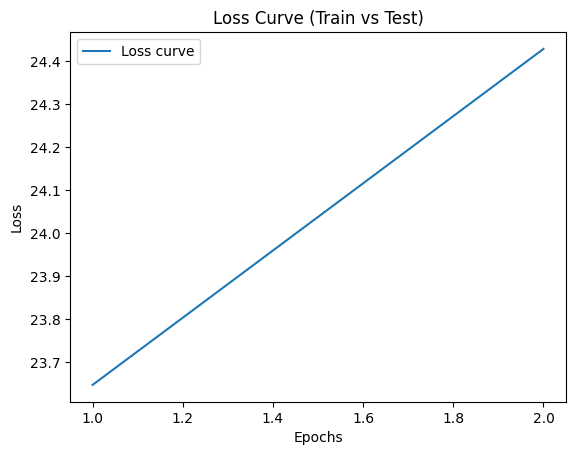

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate loss (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Plotting Loss Curve (Train vs Test)
train_loss = np.mean((model.predict(X_train_scaled) - y_train)**2)
test_loss = np.mean((model.predict(X_test_scaled) - y_test)**2)

plt.plot([1, 2], [train_loss, test_loss], label='Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve (Train vs Test)')
plt.legend()
plt.show()


4. Compare with Other Models (Decision Trees and Random Forest)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
print(f'Decision Tree MSE: {dt_mse}')

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest MSE: {rf_mse}')

# Comparing models' performance
print(f'Linear Regression MSE: {mse}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')


Decision Tree MSE: 56.36617114243324
Random Forest MSE: 26.850999892329376
Linear Regression MSE: 24.429155417908994
Decision Tree MSE: 56.36617114243324
Random Forest MSE: 26.850999892329376


5. Save the Best Model

In [ ]:
import joblib

# Assuming Linear Regression performs the best
best_model = model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']